In [9]:
import random

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from IPython import display

In [10]:
population = 500
mutations = 0.005

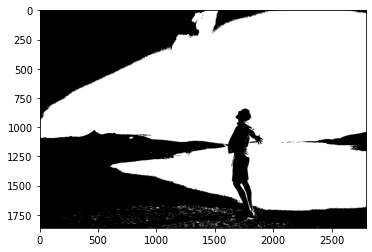

In [3]:
img_orig = Image.open('img.jpg')
gry = img_orig.convert('L')
grarray = np.asarray(gry)
img = (grarray > grarray.mean())
plt.imshow(img, cmap=plt.cm.gray)  # use appropriate colormap here
plt.show()

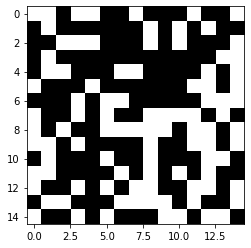

In [11]:
img = np.random.randint(2, size=(15,15))
plt.imshow(img, cmap=plt.cm.gray)  # use appropriate colormap here
plt.show()

In [12]:
rows = img.shape[0]
columns = img.shape[1]

In [84]:
def ga():

    mem = np.random.randint(2, size=(2 * population, rows, columns))

    def score(matrix1, matrix2):
        return (matrix1 == matrix2).sum()

    scores = np.zeros((2 * population))

    for i in range(100000000):

        for k, matrix in enumerate(mem):
            scores[k] = score(matrix, img)

        max_score = np.argmax(scores)

        if scores[max_score] == rows * columns:
            print(i)
            plt.imshow(mem[max_score], cmap=plt.cm.gray)  # use appropriate colormap here
            plt.show()
            break

        top_n_scores = np.argpartition(scores, -population)

        top = top_n_scores[-population:]
        bottom = top_n_scores[:-population]

        mid = rows//2

        for j in range(population):
            
            # r = random.randrange(len(top))  
            # parents = [r,(r+i+j)%len(top)]

            #idx = np.random.choice(len(top), 2, replace=False)
            r = random.randrange(len(top))  
            idx = [r, (r+1)%len(top)]
            parents = [top[idx[0]],top[idx[1]]]


            #parents = [top[0], top[1]]
            
            #parents = random.sample(set(top), 2)
            
            #parents = [top[(i+j)%(len(top))], (i+j+1)%(len(top)) ]
            
            mem[bottom[j]][0:mid,:] = mem[parents[0]][0:mid,:]
            mem[bottom[j]][-(mid+1):,:] = mem[parents[1]][-(mid+1):,:]

            idx = np.random.choice([0,1], p=[(1-mutations), mutations],size=(rows,columns))
            mem[bottom[j]] = abs(mem[bottom[j]] - idx)


149


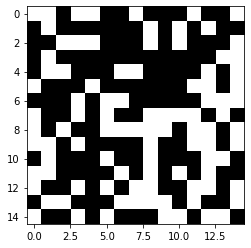

Timer unit: 1e-09 s

Total time: 3.18552 s
File: /tmp/ipykernel_5688/3054231648.py
Function: ga at line 1

Line #      Hits         Time  Per Hit   % Time  Line Contents
     1                                           def ga():
     2                                           
     3         1    1552680.0 1552680.0      0.0      mem = np.random.randint(2, size=(2 * population, rows, columns))
     4                                           
     5         1        852.0    852.0      0.0      def score(matrix1, matrix2):
     6                                                   return (matrix1 == matrix2).sum()
     7                                           
     8         1       5801.0   5801.0      0.0      scores = np.zeros((2 * population))
     9                                           
    10       150      26784.0    178.6      0.0      for i in range(100000000):
    11                                           
    12    150000   42546285.0    283.6      1.3          for

In [87]:
%lprun -f ga ga()